## **Attributes Information**


### **Attributes**
1. **`school`** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira).

2. **`sex`** - student's sex (binary: 'F' - female or 'M' - male).

3. **`age`** - student's age (numeric: from 15 to 22).

4. **`address`** - student's home address type (binary: 'U' - urban or 'R' - rural).

5. **`famsize`** - family size (binary: 'LE3' - less than or equal to 3 or 'GT3' - greater than 3).

6. **`Pstatus`**- parent's cohabitation status (binary: 'T' - living together or 'A' - apart).

7. **`Medu`** - mother's education (numeric: **0** - none, **1** - primary education (4th grade), **2** - 5th to 9th grade, **3** - secondary education or **4** - higher education).

8. **`Fedu`** - father's education (numeric: **0** - none, **1** - primary education (4th grade), **2** - 5th to 9th grade, **3** - secondary education or **4** - higher education).

9. **`Mjob`** - mother's job (nominal: '*teacher*', '*health*' care related, civil '*services*' (e.g. administrative or police), '*at_home*' or '*other*').

10. **`Fjob`**- father's job (nominal: '*teacher*', '*health*' care related, civil '*services*' (e.g. administrative or police), '*at_home*' or '*other*').

11. **`reason`** - reason to choose this school (nominal: close to '*home*', school '*reputation*', '*course*' preference or '*other*').

12. **`guardian`** - student's guardian (nominal: 'mother', 'father' or 'other').

13. **`traveltime`** - home to school travel time (numeric: **1** - <15 min., **2** - 15 to 30 min., **3** - 30 min. to 1 hour, or **4** - >1 hour).

14. **`studytime`** - weekly study time (numeric: **1** - <2 hours, **2** - 2 to 5 hours, **3** - 5 to 10 hours, or **4** - >10 hours).

15. **`failures`** - number of past class failures (numeric: n if **0 <= n < 3**, else **3**).

16. **`schoolsup`** - extra educational support (binary: yes or no).

17. **`famsup`** - family educational support (binary: yes or no).

18. **`paid`** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no).

19. **`activities`** - extra-curricular activities (binary: yes or no).

20. **`nursery`** - attended nursery school (binary: yes or no).

21. **`higher`** - wants to take higher education (binary: yes or no).

22. **`internet`** - Internet access at home (binary: yes or no).

23. **`romantic`** - with a romantic relationship (binary: yes or no).

24. **`famrel`** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent).

25. **`freetime`** - free time after school (numeric: from **1** - very low to **5** - very high).

26. **`goout`** - going out with friends (numeric: from **1** - very low to **5** - very high).

27. **`Dalc`** - workday alcohol consumption (numeric: from **1** - very low to **5** - very high).

28. **`Walc`** - weekend alcohol consumption (numeric: from **1** - very low to **5** - very high).

29. **`health`** - current health status (numeric: from **1** - very bad to **5** - very good).

30. **`absences`** - number of school absences (numeric: from **0** to **93**).

##  **Grades which are related with the course subject:**

31. **`G1`** - first period grade (numeric: from **0** to **20**).
32. **`G2`** - second period grade (numeric: from **0** to **20**)
33. **`G3`** - final grade (numeric: from **0** to **20**, `Output Target`)

## **1. Imports**




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import (
    LinearRegression,
    Ridge,
    Lasso,
    BayesianRidge,
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
)
from numpy.ma.core import sqrt
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    confusion_matrix
)

## **2. Loading Data**

In [3]:
data=pd.read_csv('..\student-por.csv')

In [4]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
data.shape

(649, 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

> #### Delete colums

In [7]:
#drop data yang tidak sesuai dengan aplikasi yang akan dibagun
#data yang di drop juga berupa data yang tidak sesuai dengan adat di indonesia
data = data.drop(columns = ['school','address', 'traveltime', 'schoolsup',
                            'famsup', 'paid', 'nursery',
                            'famrel', 'reason','freetime','goout',
                            'Dalc','Walc','health'], axis = 1)

In [8]:
data.columns.to_frame().T

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,activities,higher,internet,romantic,absences,G1,G2,G3
0,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,activities,higher,internet,romantic,absences,G1,G2,G3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         649 non-null    object
 1   age         649 non-null    int64 
 2   famsize     649 non-null    object
 3   Pstatus     649 non-null    object
 4   Medu        649 non-null    int64 
 5   Fedu        649 non-null    int64 
 6   Mjob        649 non-null    object
 7   Fjob        649 non-null    object
 8   guardian    649 non-null    object
 9   studytime   649 non-null    int64 
 10  failures    649 non-null    int64 
 11  activities  649 non-null    object
 12  higher      649 non-null    object
 13  internet    649 non-null    object
 14  romantic    649 non-null    object
 15  absences    649 non-null    int64 
 16  G1          649 non-null    int64 
 17  G2          649 non-null    int64 
 18  G3          649 non-null    int64 
dtypes: int64(9), object(10)
memory usage: 96.5+ KB


> #### Displaying the numerical categorical attributes.

In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)
print(len(categorical_columns))

['sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'activities', 'higher', 'internet', 'romantic']
10


In [11]:
numerical_columns = data.select_dtypes(include=['int64']).columns.tolist()
print(numerical_columns)
print(len(numerical_columns))

['age', 'Medu', 'Fedu', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']
9


> #### Displaying some statistics about the numerical data.

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
absences,649.0,3.659476,4.640759,0.0,0.0,2.0,6.0,32.0
G1,649.0,11.399076,2.745265,0.0,10.0,11.0,13.0,19.0
G2,649.0,11.570108,2.913639,0.0,10.0,11.0,13.0,19.0
G3,649.0,11.906009,3.230656,0.0,10.0,12.0,14.0,19.0


In [13]:
data.describe(include='object').T

,count,unique,top,freq
sex,649,2,F,383
famsize,649,2,GT3,457
Pstatus,649,2,T,569
Mjob,649,5,other,258
Fjob,649,5,other,367
guardian,649,3,mother,455
activities,649,2,no,334
higher,649,2,yes,580
internet,649,2,yes,498
romantic,649,2,no,410


## **3. Data Analysis(EDA)**

### **General Analysis Data and Grades**

<Figure size 1800x1200 with 0 Axes>

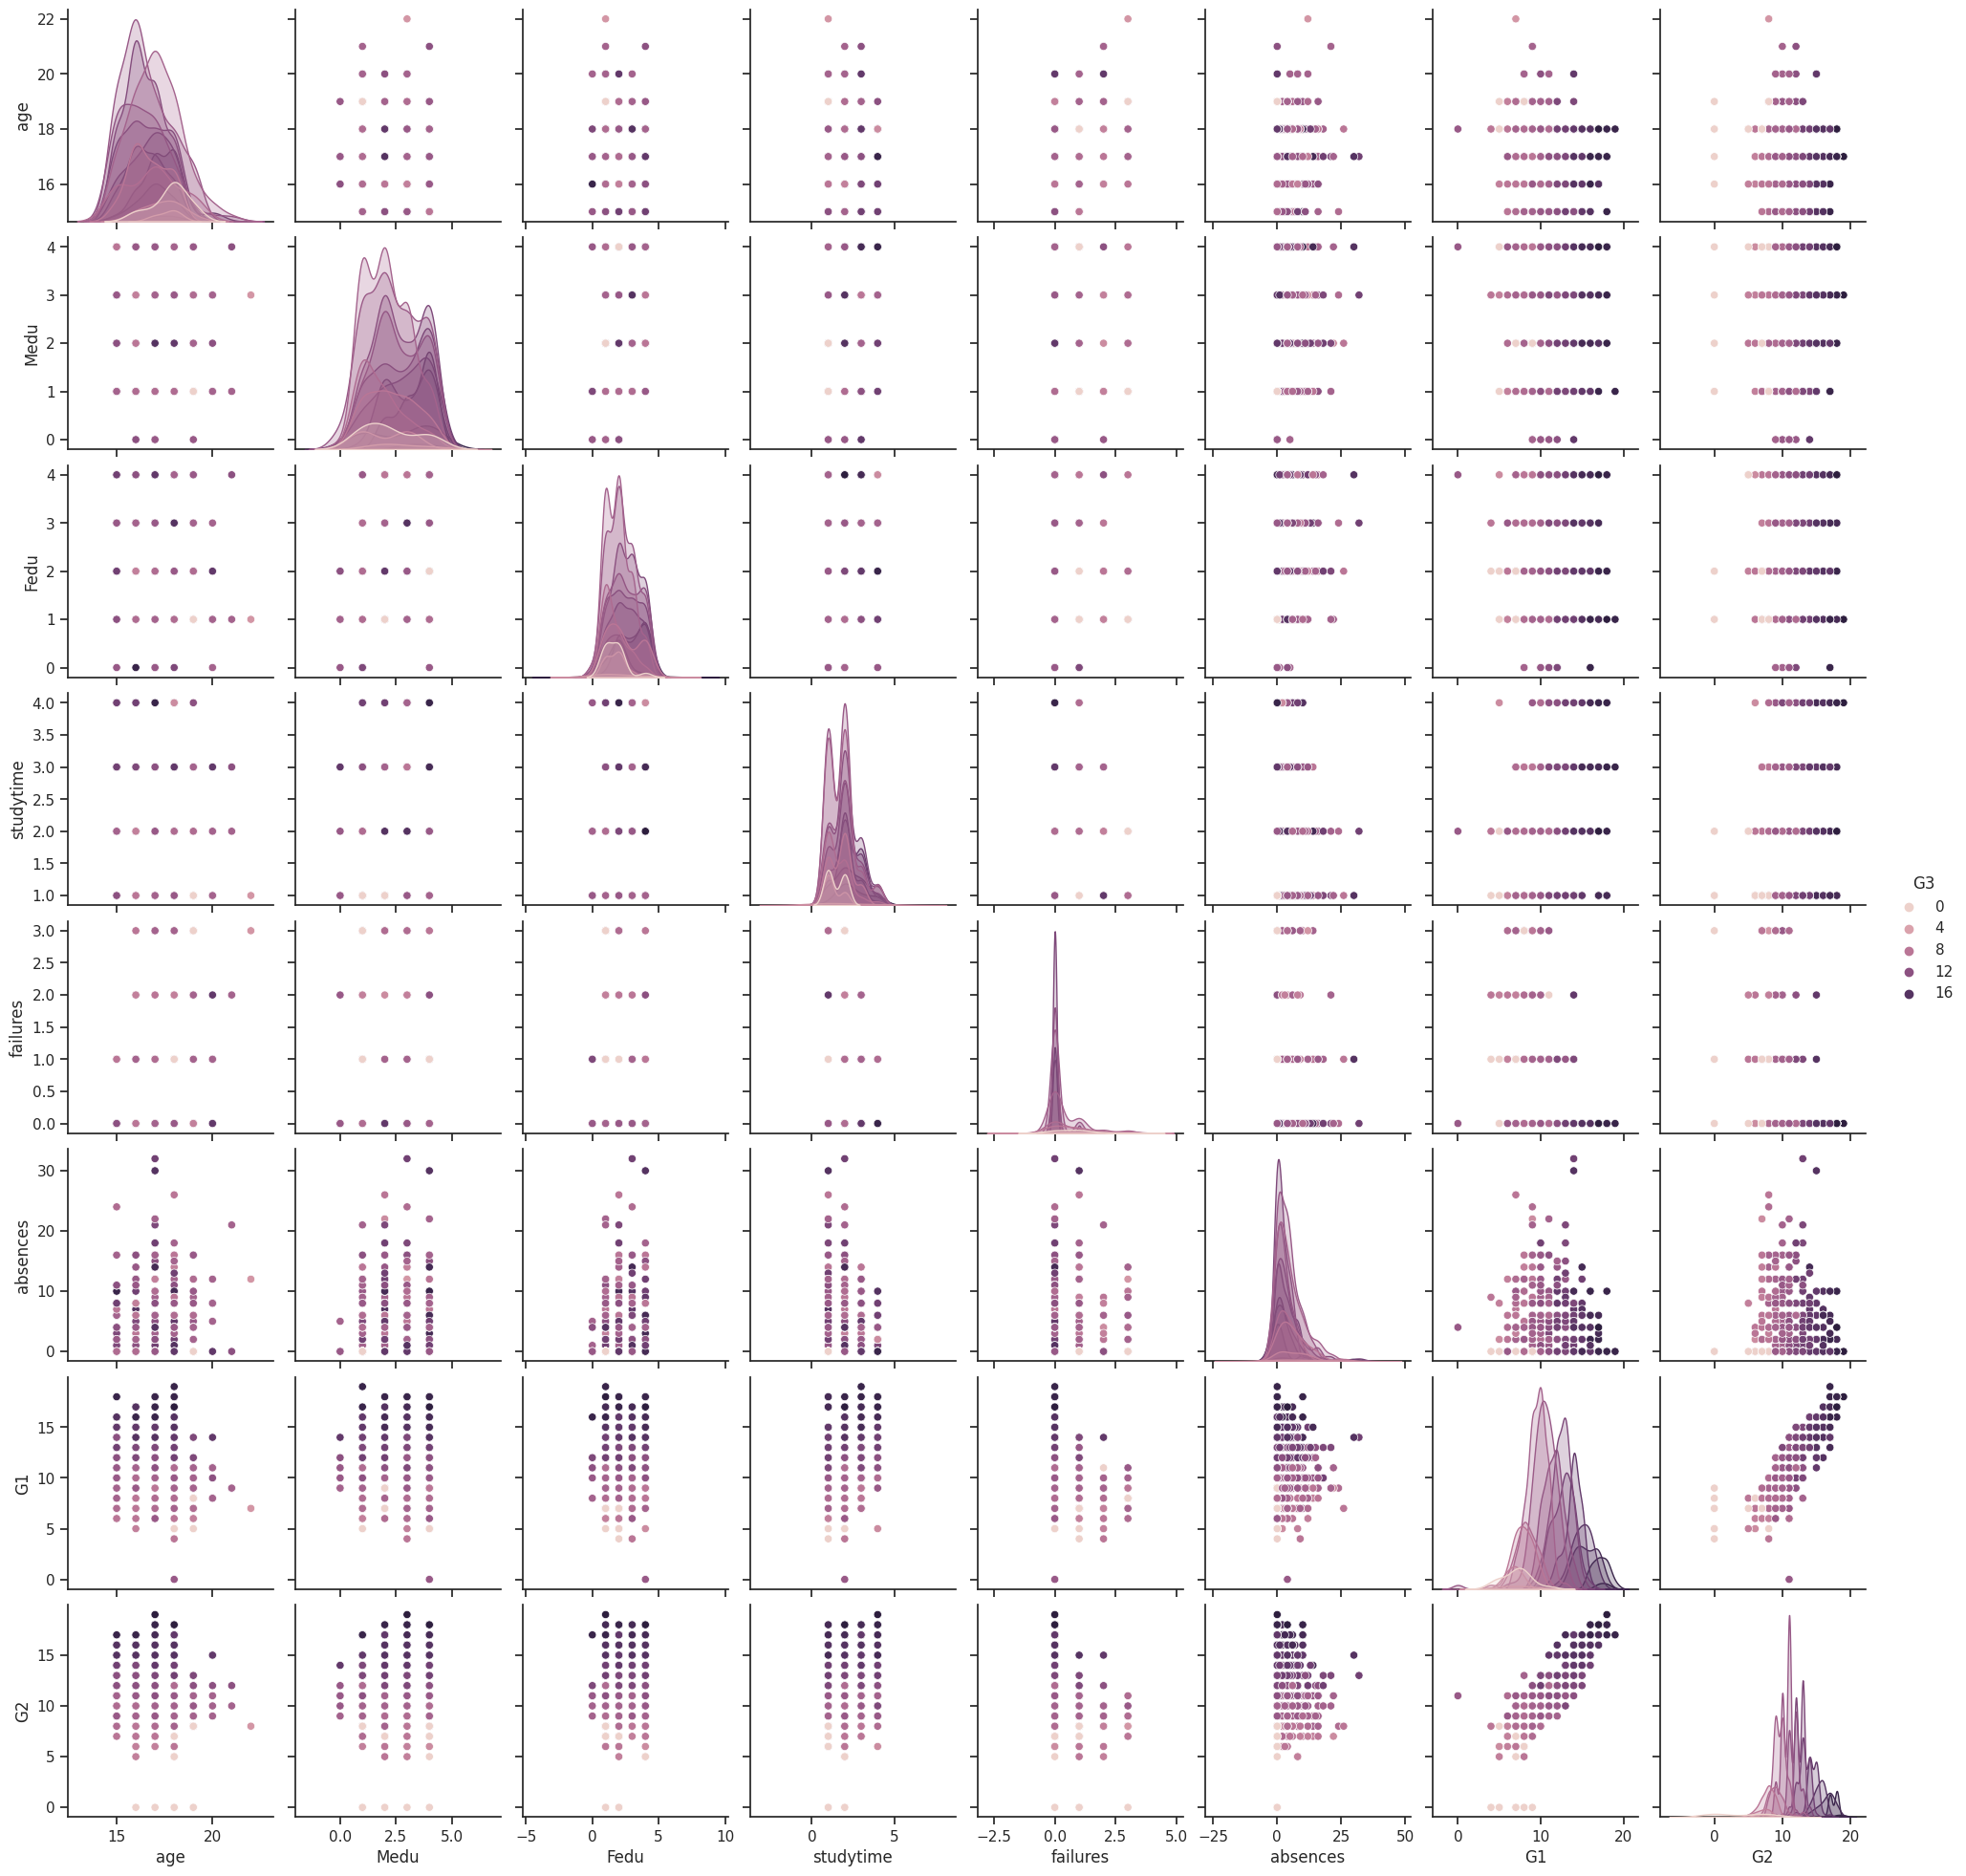

In [14]:
plt.figure(figsize=(18, 12))
sns.set_theme(style="ticks")
sns.pairplot(data, hue="G3")

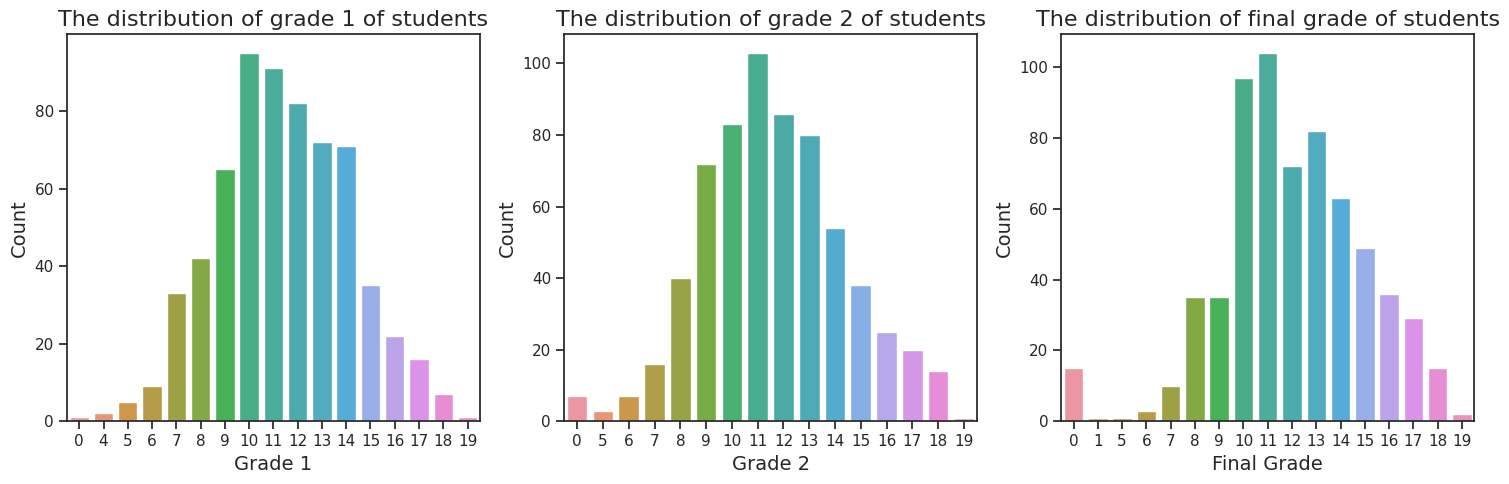

In [15]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for G1
b1 = sns.countplot(x='G1', data=data, ax=axs[0])
b1.set_title('The distribution of grade 1 of students', fontsize=16)
b1.set_xlabel('Grade 1', fontsize=14)
b1.set_ylabel('Count', fontsize=14)

# Plot for G2
b2 = sns.countplot(x='G2', data=data, ax=axs[1])
b2.set_title('The distribution of grade 2 of students', fontsize=16)
b2.set_xlabel('Grade 2', fontsize=14)
b2.set_ylabel('Count', fontsize=14)

# Plot for G3
b3 = sns.countplot(x='G3', data=data, ax=axs[2])
b3.set_title('The distribution of final grade of students', fontsize=16)
b3.set_xlabel('Final Grade', fontsize=14)
b3.set_ylabel('Count', fontsize=14)


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note:** Sebagian besar siswa mendapat final grade antara '10' dan '11'. Kita bisa melihat banyaknya angka nol, mungkin siswa yang tidak hadir dalam ujian atau tidak diberi izin untuk mengikuti ujian karena alasan lain mendapat nilai '0', atau nilainya nol. Kami tidak bisa memastikannya. Mari kita cari nilai null apa pun di tabel.

### **3.1 Melihat nilai yang hilang**

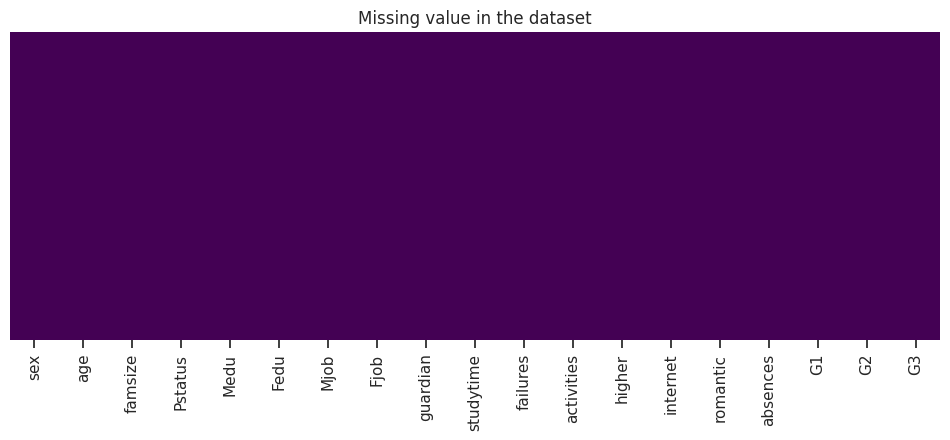

In [16]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

**Note:** Seperti yang kita lihat, tidak ada nilai yang hilang sehingga kita dapat mempertimbangkan hipotesis lainnya. (Siswa yang tidak hadir dalam ujian atau yang tidak diberi izin untuk mengikuti ujian karena alasan lain akan mendapat skor '0').

### **3.2 Apakah gender memiliki peran yang penting grades of student?**

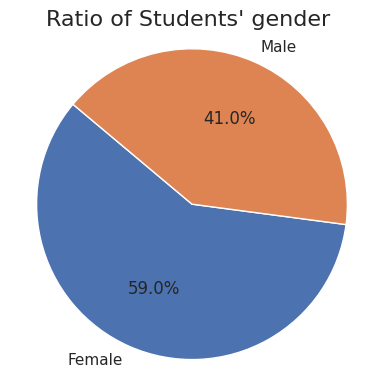

In [17]:
total = len(data)
value_counts = data['sex'].value_counts()
percentages = value_counts / total * 100

# Rename the labels from 'F' and 'M' to custom names
value_counts.index = ['Female', 'Male']

plt.figure(figsize=(4, 4))
plt.pie(
    percentages,
    labels=value_counts.index,
    autopct=lambda p: f'{p:.1f}%',
    startangle=140,
)

# Equal aspect ratio ensures that the pie is drawn as a circle.
plt.axis('equal')

# Add a title
plt.title("Ratio of Students' gender ", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

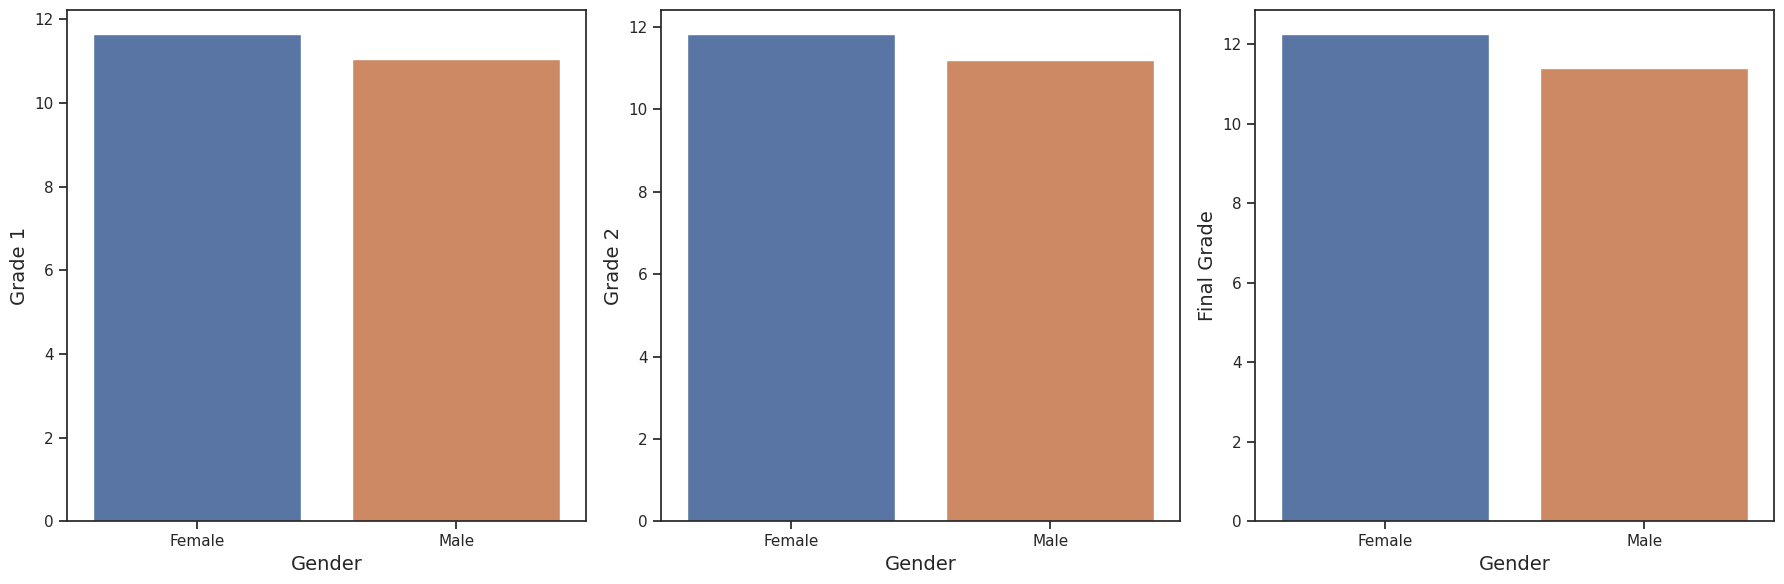

In [18]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for G1
sns.barplot(x='sex', y='G1', data=data,errorbar=None,  ax=axs[0])
axs[0].set_xlabel('Gender', fontsize=14)
axs[0].set_ylabel('Grade 1', fontsize=14)
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(["Female", "Male"])

# Plot for G2
sns.barplot(x='sex', y='G2', data=data,errorbar=None, ax=axs[1])
axs[1].set_xlabel('Gender', fontsize=14)
axs[1].set_ylabel('Grade 2', fontsize=14)
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(["Female", "Male"])

# Plot for G3
sns.barplot(x='sex', y='G3', data=data,errorbar=None, ax=axs[2])
axs[2].set_xlabel('Gender', fontsize=14)
axs[2].set_ylabel('Final Grade', fontsize=14)
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(["Female", "Male"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note**:
Perempuan mendapat nilai sedikit lebih tinggi dibandingkan Laki-laki pada setiap Grade.

### **3.3 Perbandingan Umur pada setiap kelompok pada grade**

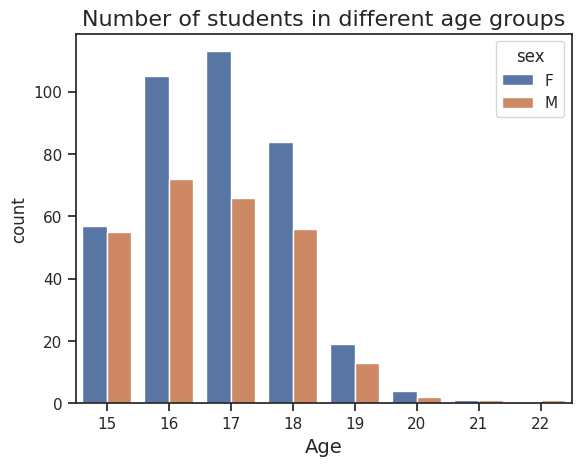

In [19]:
sns.countplot(x='age', hue='sex', data=data)
plt.title('Number of students in different age groups', fontsize=16)
plt.xlabel("Age", fontsize=14)

plt.show()

**Note**:
Usianya tampaknya berkisar antara 15 hingga 19 tahun dan sebagian besar siswanya berusia 17 tahun.

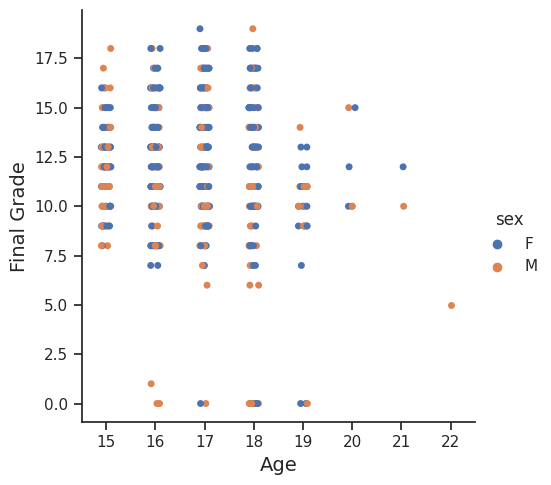

In [20]:
sns.catplot(x='age', y='G3',hue='sex', data=data)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Final Grade', fontsize = 14)

plt.show()

**Note**: Kita melihat bahwa terdapat beberapa umur yang memilki final grade degan nilai 0.

### **3.4 Apakah jumlah keluarga mempengaruhi grade siswa?**

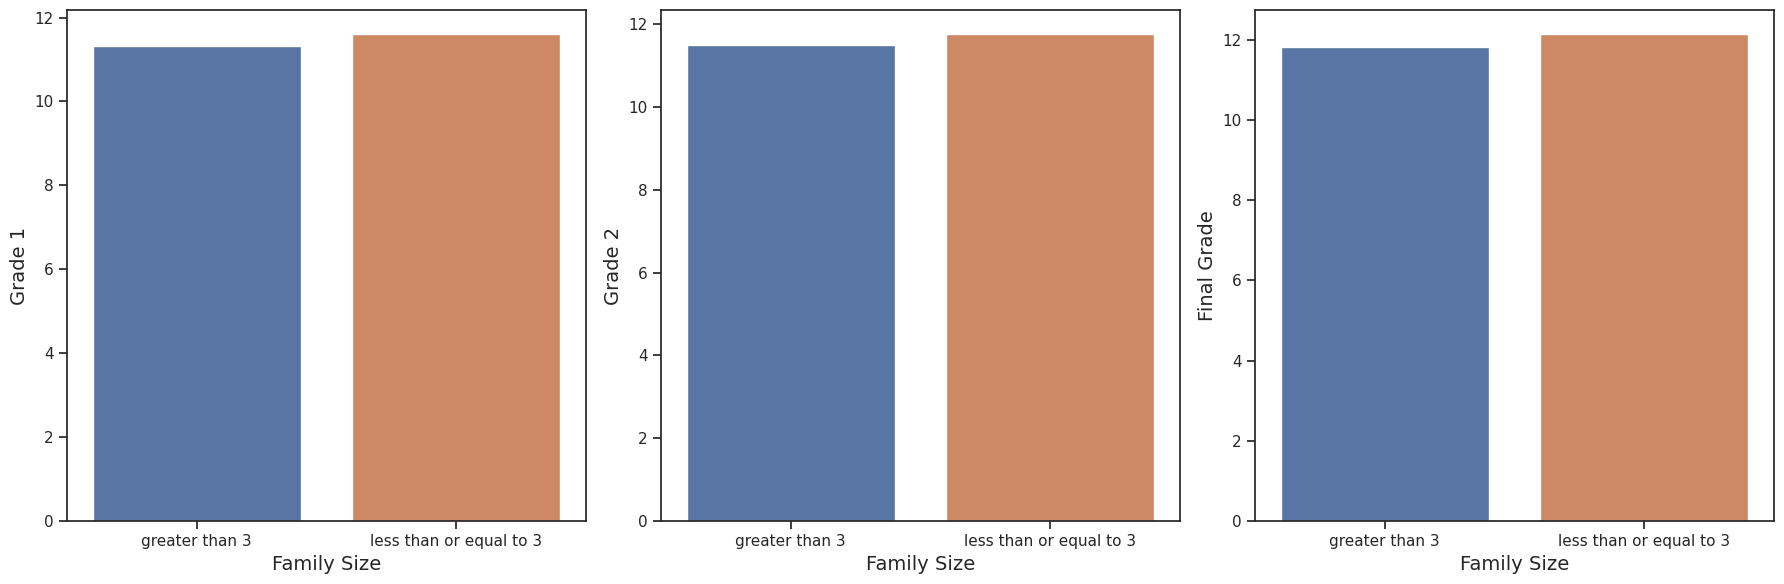

In [21]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=data['famsize'], y=data['G1'], data=data, errorbar=None, ax=axs[0])
b1.set_xlabel("Family Size", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["greater than 3", "less than or equal to 3"])

# Grade 2 plot
b2 = sns.barplot(x=data['famsize'], y=data['G2'], data=data, errorbar=None, ax=axs[1])
b2.set_xlabel("Family Size", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["greater than 3", "less than or equal to 3"])

# Final Grade plot
b3 = sns.barplot(x=data['famsize'], y=data['G3'], data=data, errorbar=None, ax=axs[2])
b3.set_xlabel("Family Size", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["greater than 3", "less than or equal to 3"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note :** Daridata sebaran yang tampak jumlah angota keluarga tidak mempengarusi tinggi rendahnya grade yang didapatkan

### **3.5 Apakah tinggal dengan Orangtua mempengaruhi grades siswa?**

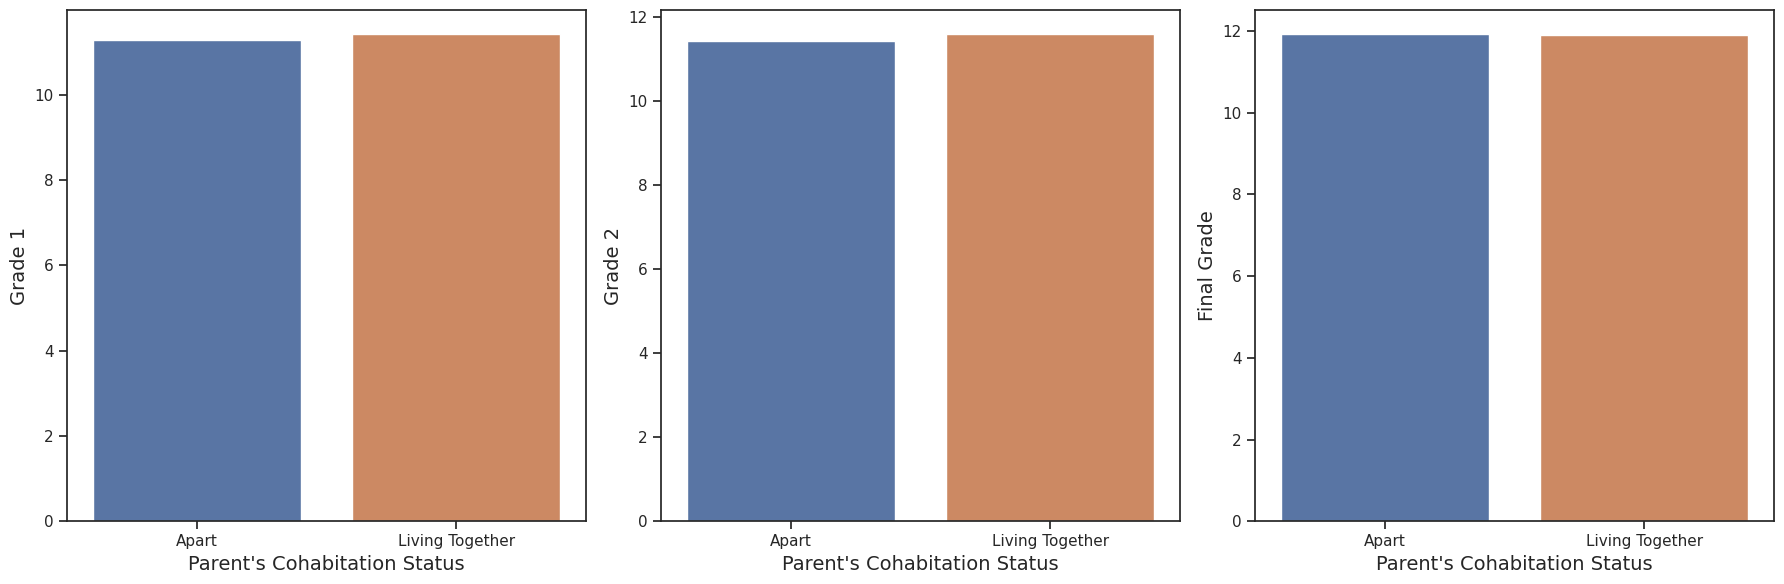

In [22]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=data['Pstatus'], y=data['G1'], data=data, errorbar=None, ax=axs[0])
b1.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["Apart", "Living Together"])

# Grade 2 plot
b2 = sns.barplot(x=data['Pstatus'], y=data['G2'], data=data, errorbar=None, ax=axs[1])
b2.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["Apart", "Living Together"])

# Final Grade plot
b3 = sns.barplot(x=data['Pstatus'], y=data['G3'], data=data, errorbar=None, ax=axs[2])
b3.set_xlabel("Parent's Cohabitation Status", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["Apart", "Living Together"])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note**: Parent's cohabitation statusnya mendapat nilai yang tergolong sama dari siswa yang tingal di Apart maupun siswa yang tinggal bersama orangtua

### **3.6 Relasi pendidikan orang tua terhadapt grade yang didapatkan**



> #### **How Does Father's Education Level Impact the Grades?**



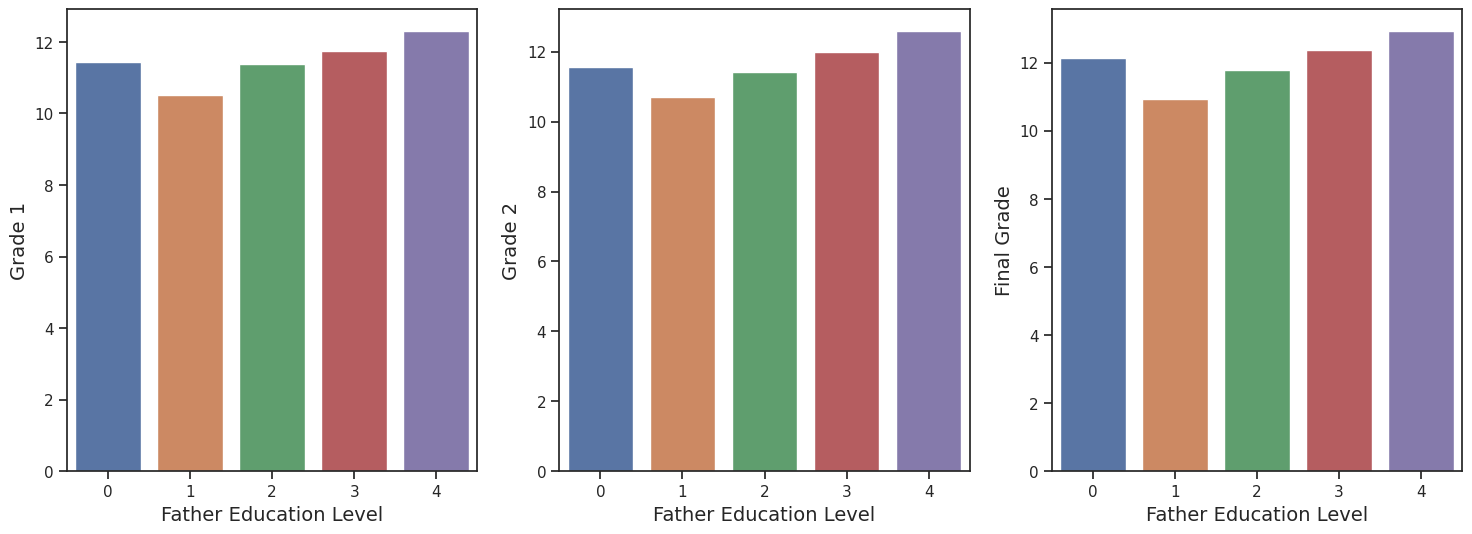

0 - None
1 - Primary (4th Grade)
2 - 5th to 9th Grade
3 - Secondary Education
4 - Higher Education


In [23]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
education_descriptions = [
    "0 - None",
    "1 - Primary (4th Grade)",
    "2 - 5th to 9th Grade",
    "3 - Secondary Education",
    "4 - Higher Education"
]
# Grade 1 plot
b1 = sns.barplot(x='Fedu', y='G1', data=data, errorbar=None, ax=axs[0])
b1.set_xlabel("Father Education Level", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Grade 2 plot
b2 = sns.barplot(x='Fedu', y='G2', data=data, errorbar=None, ax=axs[1])
b2.set_xlabel("Father Education Level", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Final Grade plot
b3 = sns.barplot(x='Fedu', y='G3', data=data,errorbar=None, ax=axs[2])
b3.set_xlabel("Father Education Level", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Show the plots
plt.show()
print(*education_descriptions, sep = "\n")

**Note**: Bisa dilihat murid dengan ayah yang berpedidikan memiliki nilai grade yang lebih tinggi .


> #### **How Does Mother's Education Level Impact the Grades?**



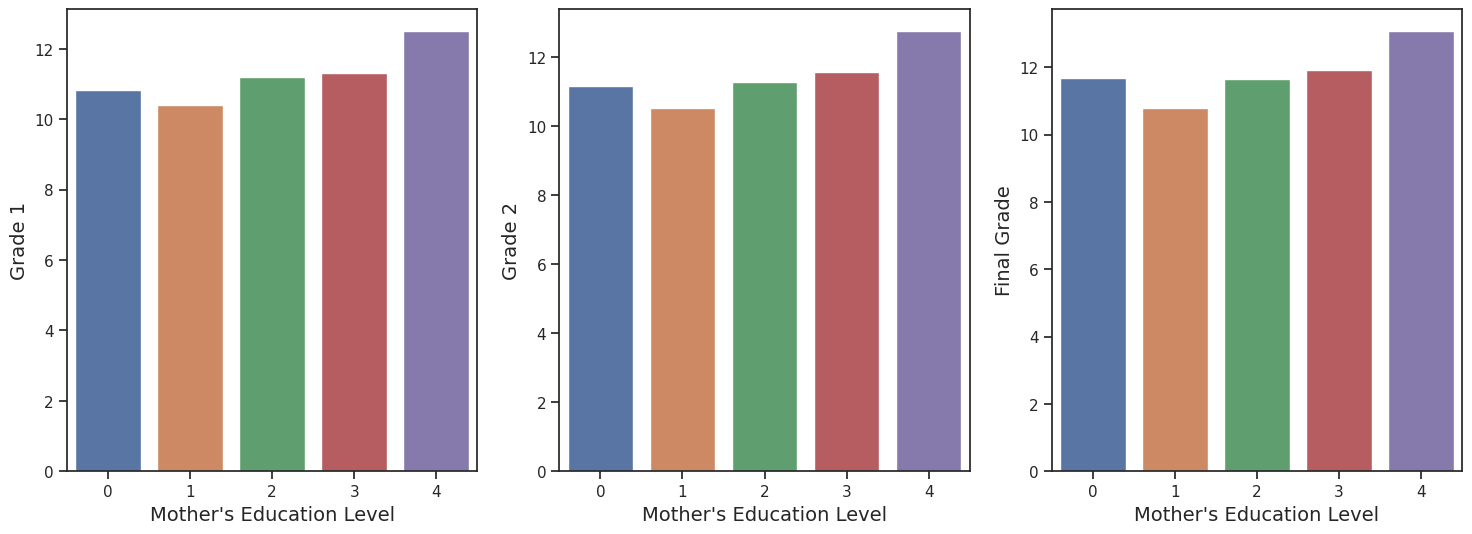

0 - None
1 - Primary (4th Grade)
2 - 5th to 9th Grade
3 - Secondary Education
4 - Higher Education


In [24]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
education_descriptions = [
    "0 - None",
    "1 - Primary (4th Grade)",
    "2 - 5th to 9th Grade",
    "3 - Secondary Education",
    "4 - Higher Education"
]
# Grade 1 plot
b1 = sns.barplot(x='Medu', y='G1', data=data, errorbar=None, ax=axs[0])
b1.set_xlabel("Mother's Education Level", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Grade 2 plot
b2 = sns.barplot(x='Medu', y='G2', data=data, errorbar=None, ax=axs[1])
b2.set_xlabel("Mother's Education Level", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Final Grade plot
b3 = sns.barplot(x='Medu', y='G3', data=data,errorbar=None, ax=axs[2])
b3.set_xlabel("Mother's Education Level", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Show the plots
plt.show()
print(*education_descriptions, sep = "\n")

**Note**: Bisa dilihat murid dengan ibu yang berpedidikan memiliki nilai grade yang lebih tinggi .

### **3.7 Relasi pekerjaan orangtua terhadapt grades yang didapatkan**


> #### **How Does Father's Jobs Impact the Grades?**

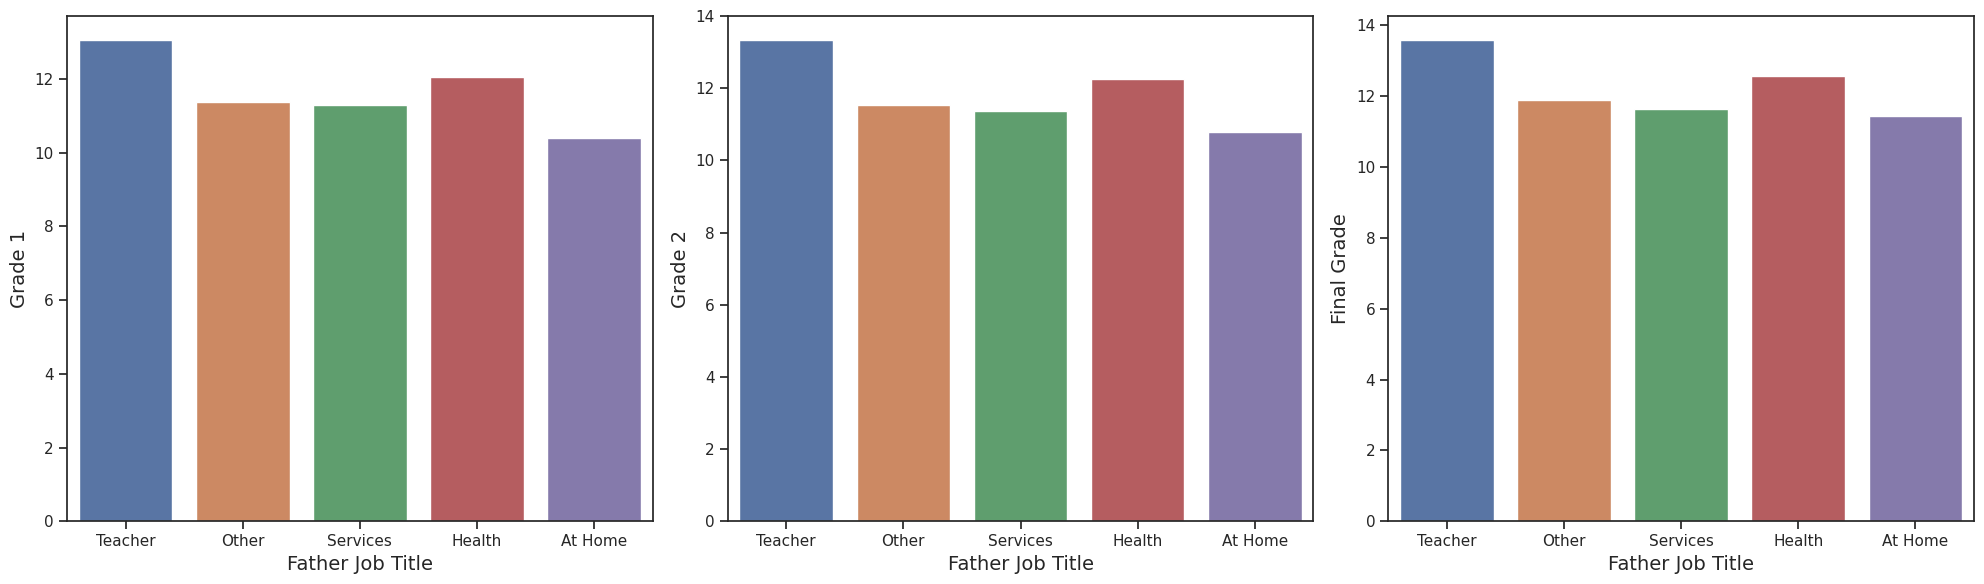

In [25]:

# Create a figure with three subplots arranged in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first chart
b1 = sns.barplot(x=data['Fjob'], y=data['G1'], data=data, ax=ax1, errorbar=None)
b1.set_xlabel('Father Job Title', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])

# Plot the second chart
b2 = sns.barplot(x=data['Fjob'], y=data['G2'], data=data, ax=ax2, errorbar=None)
b2.set_xlabel('Father Job Title', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])

# Plot the third chart
b3 = sns.barplot(x=data['Fjob'], y=data['G3'], data=data, ax=ax3, errorbar=None)
b3.set_xlabel('Father Job Title', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["Teacher", "Other", "Services", "Health", "At Home"])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()


**Note**: Siswa yang ayahnya seorang guru dan bekerja di bidang kesehatan mendapat nilai lebih tinggi dibandingkan siswa lainnya


> #### **How Does Mother's Jobs Impact the Grades?**

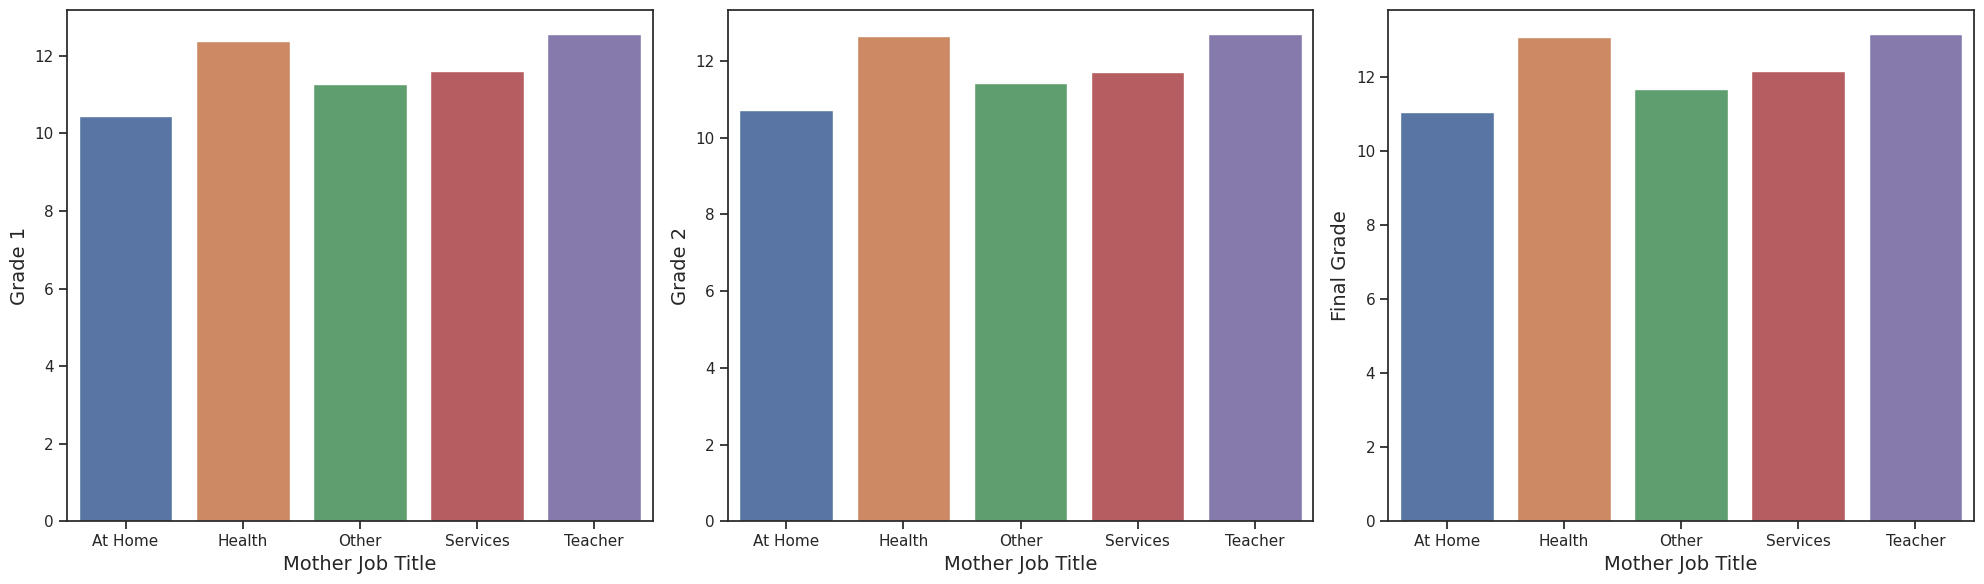

In [26]:
# Create a figure with three subplots arranged in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Plot the first chart
b1 = sns.barplot(x=data['Mjob'], y=data['G1'], data=data, ax=ax1, errorbar=None)
b1.set_xlabel('Mother Job Title', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])

# Plot the second chart
b2 = sns.barplot(x=data['Mjob'], y=data['G2'], data=data, ax=ax2, errorbar=None)
b2.set_xlabel('Mother Job Title', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])

# Plot the third chart
b3 = sns.barplot(x=data['Mjob'], y=data['G3'], data=data, ax=ax3, errorbar=None)
b3.set_xlabel('Mother Job Title', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(["At Home", "Health", "Other", "Services", "Teacher"])

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

**Note:** Siswa yang ibunya seorang guru dan bekerja di bidang kesehatan mendapat nilai lebih tinggi dibandingkan siswa lainnya

### **3.8 Apakah penjaga mempengaruhi grade yang didapat**

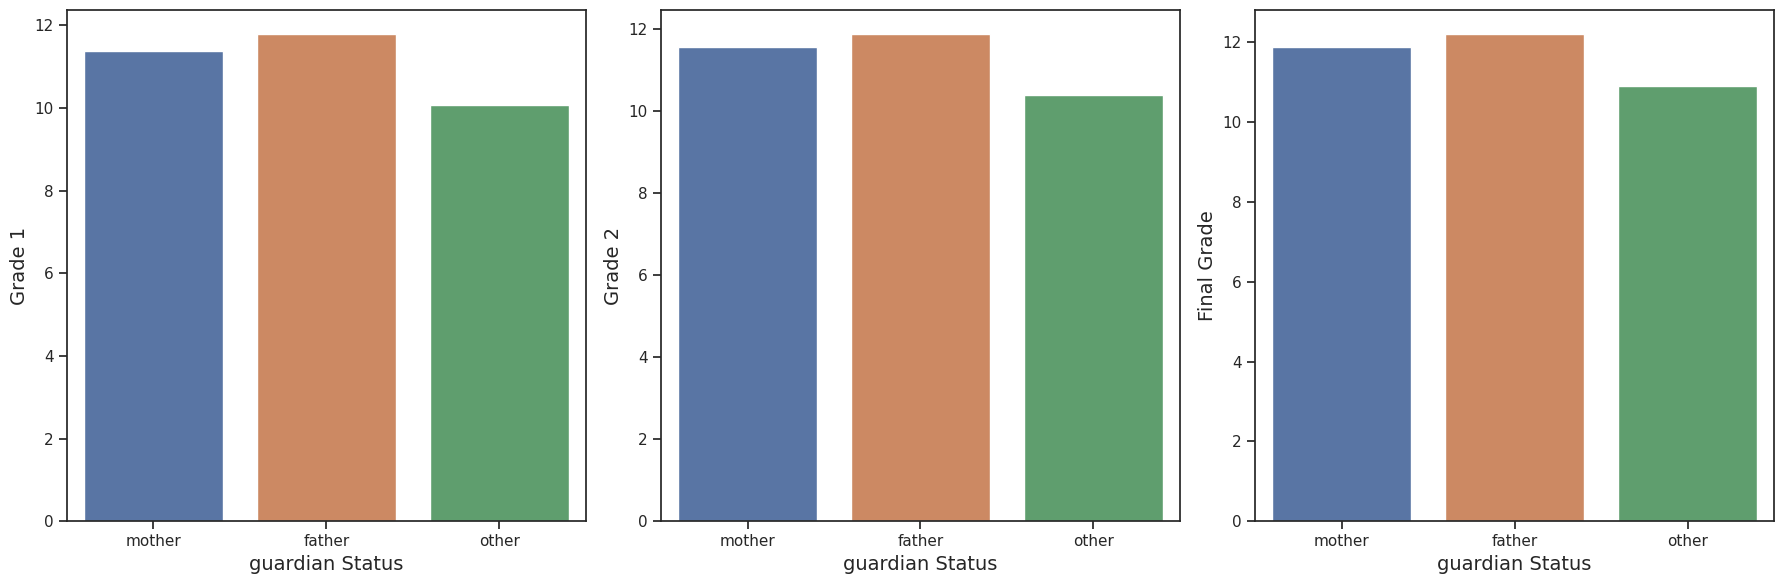

In [27]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=data['guardian'], y=data['G1'], data=data, errorbar=None, ax=axs[0])
b1.set_xlabel("guardian Status", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)
b1.set_xticklabels(['mother', 'father' , 'other'])

# Grade 2 plot
b2 = sns.barplot(x=data['guardian'], y=data['G2'], data=data, errorbar=None, ax=axs[1])
b2.set_xlabel("guardian Status", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)
b2.set_xticklabels(['mother', 'father' , 'other'])

# Final Grade plot
b3 = sns.barplot(x=data['guardian'], y=data['G3'], data=data, errorbar=None, ax=axs[2])
b3.set_xlabel("guardian Status", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)
b3.set_xticklabels(['mother', 'father' , 'other'])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note :** data menunjukan siswa yang tinggal bersama ayah memiliki grade yang lebih tinggi

### **3.9 Apa relasi diantara waktu belajar dengan grade yang didapatkan?**

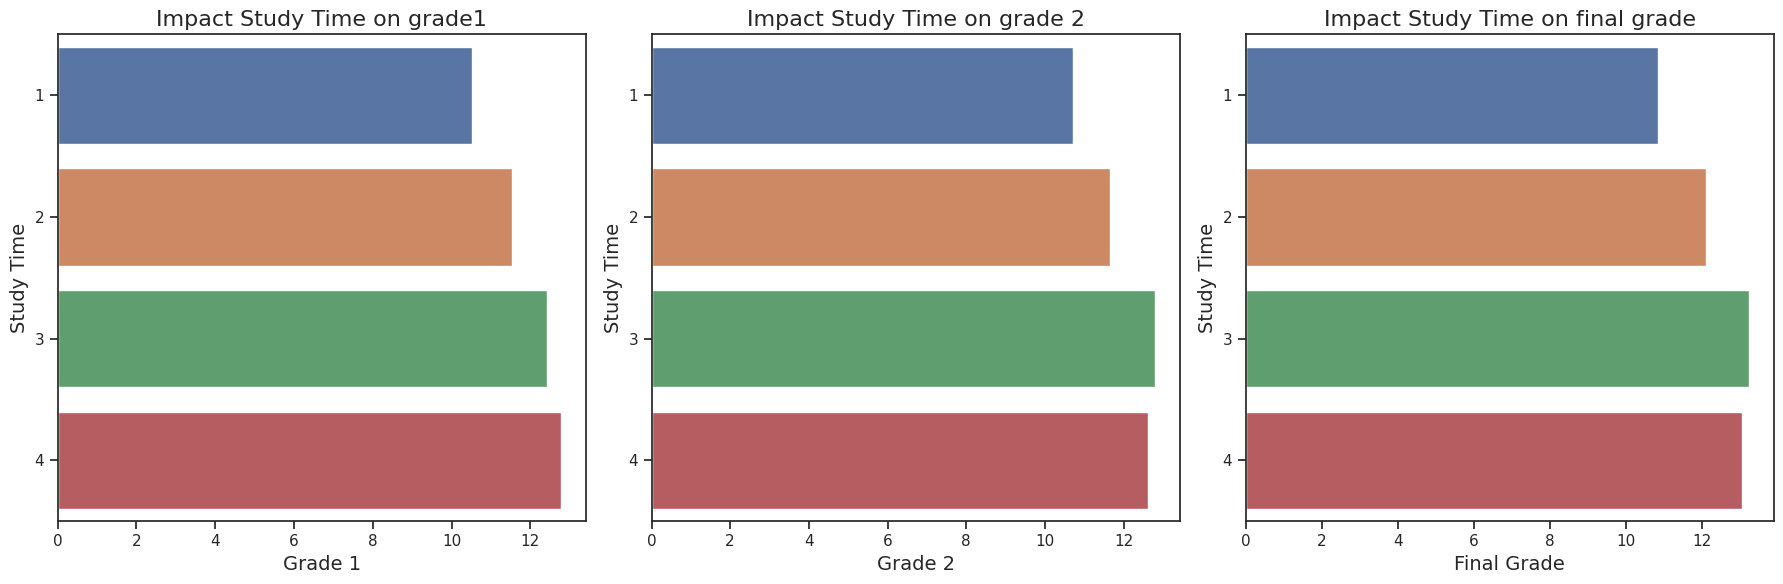

1 - <2 hours
2 - 2 to 5 hours
3 - 5 to 10 hours
4 - 10 hours


In [28]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
study_times = [
    "1 - <2 hours",
    "2 - 2 to 5 hours",
    "3 - 5 to 10 hours",
    "4 - 10 hours"
]

# Create the first horizontal bar plot
b1 = sns.barplot(x=data['G1'], y=data['studytime'], data=data, errorbar=None, ax=axs[0], orient='h')
b1.set_ylabel('Study Time', fontsize=14)
b1.set_xlabel('Grade 1', fontsize=14)
b1.set_title('Impact Study Time on grade1', fontsize=16)

# Create the second horizontal bar plot
b2 = sns.barplot(x=data['G2'], y=data['studytime'], data=data, errorbar=None, ax=axs[1], orient='h')
b2.set_ylabel('Study Time', fontsize=14)
b2.set_xlabel('Grade 2', fontsize=14)
b2.set_title('Impact Study Time on grade 2', fontsize=16)


# Create the third horizontal bar plot
b3 = sns.barplot(x=data['G3'], y=data['studytime'], data=data, errorbar=None, ax=axs[2], orient='h')
b3.set_ylabel('Study Time', fontsize=14)
b3.set_xlabel('Final Grade', fontsize=14)
b3.set_title('Impact Study Time on final grade', fontsize=16)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
print(*study_times, sep="\n")

**Note:** Siswa yang belajar 5 to 10 jam mendapatkan nilai yang lebih tinggi pada grade ke 2 dan final grade

### **3.10 Apakah mengikuti ekstrakulikuler bisa mempengaruhi grade?**

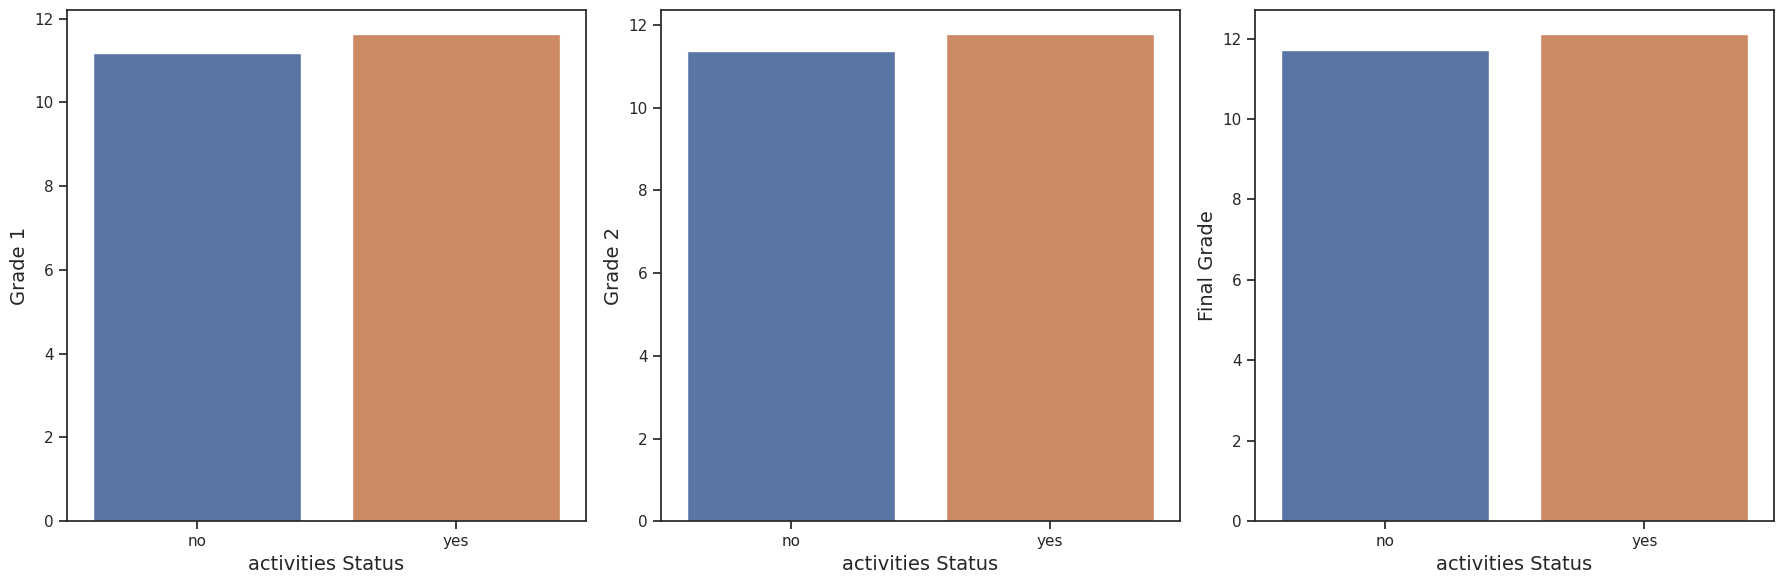

In [29]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=data['activities'], y=data['G1'], data=data, errorbar=None, ax=axs[0])
b1.set_xlabel("activities Status", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Grade 2 plot
b2 = sns.barplot(x=data['activities'], y=data['G2'], data=data, errorbar=None, ax=axs[1])
b2.set_xlabel("activities Status", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Final Grade plot
b3 = sns.barplot(x=data['activities'], y=data['G3'], data=data, errorbar=None, ax=axs[2])
b3.set_xlabel("activities Status", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### **3.11 Apakah motifasi untuk melanjutkan jenjang pendidikan bisa mempengaruhi grade?**

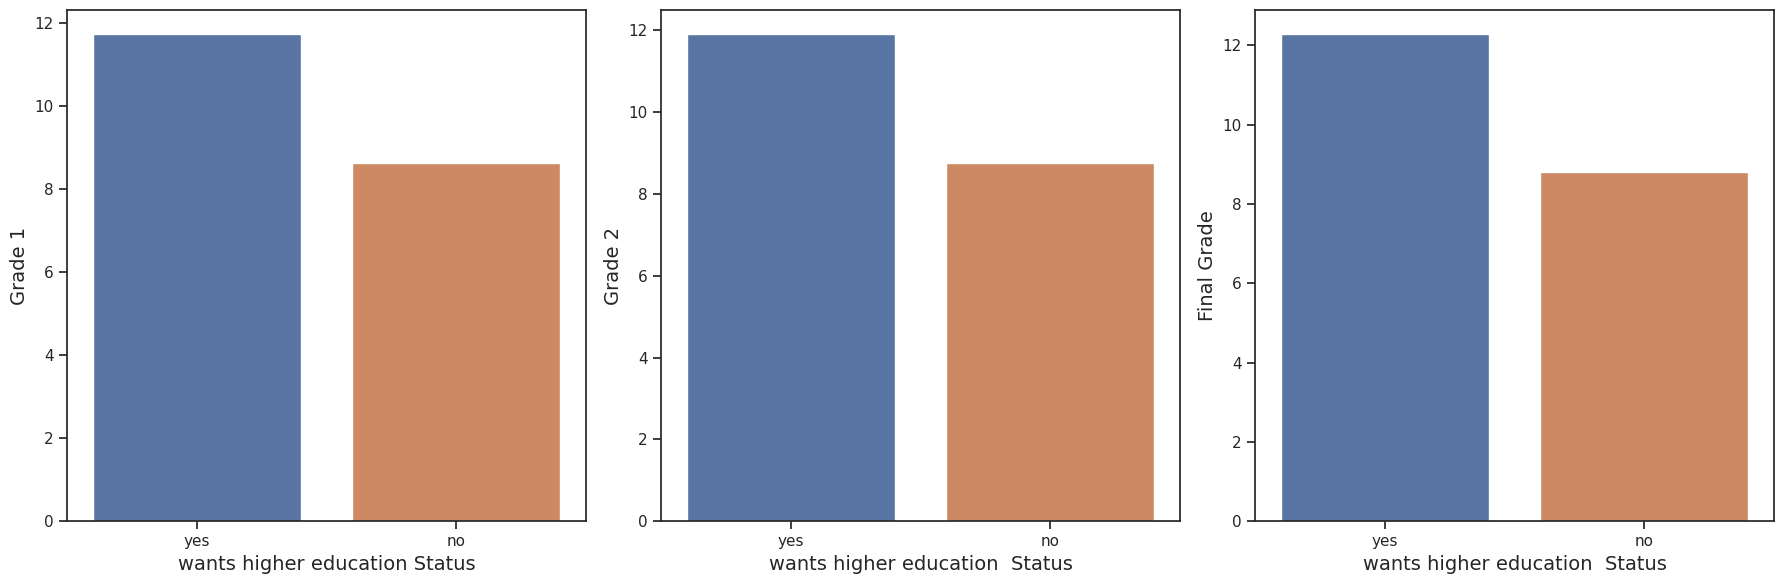

In [30]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=data['higher'], y=data['G1'], data=data, errorbar=None, ax=axs[0])
b1.set_xlabel("wants higher education Status", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Grade 2 plot
b2 = sns.barplot(x=data['higher'], y=data['G2'], data=data, errorbar=None, ax=axs[1])
b2.set_xlabel("wants higher education  Status", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Final Grade plot
b3 = sns.barplot(x=data['higher'], y=data['G3'], data=data, errorbar=None, ax=axs[2])
b3.set_xlabel("wants higher education  Status", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note :** signifikan data menunjukan yang menjawab ya memiliki grade yang jauh lebih tinggi

### **3.12 Relasi internet terhadap grade siswa**

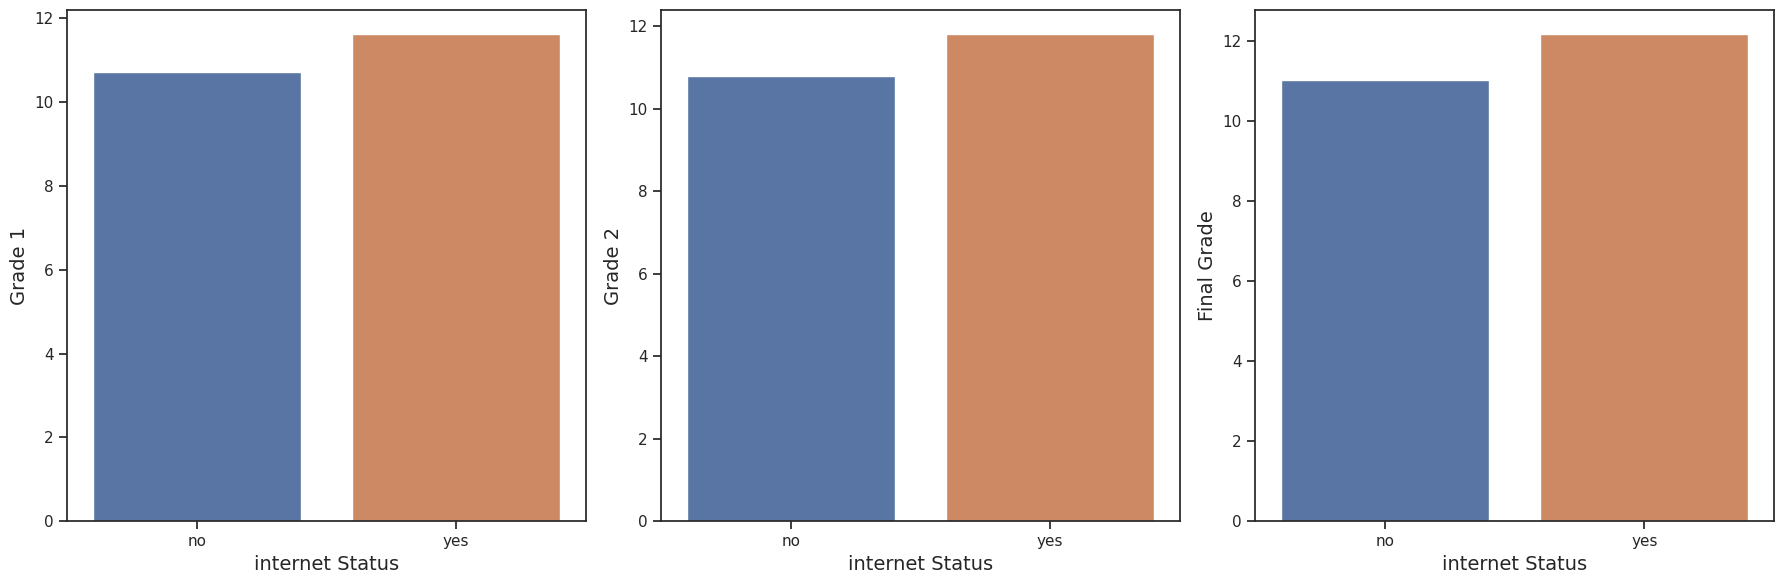

In [31]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=data['internet'], y=data['G1'], data=data, errorbar=None, ax=axs[0])
b1.set_xlabel("internet Status", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Grade 2 plot
b2 = sns.barplot(x=data['internet'], y=data['G2'], data=data, errorbar=None, ax=axs[1])
b2.set_xlabel("internet Status", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Final Grade plot
b3 = sns.barplot(x=data['internet'], y=data['G3'], data=data, errorbar=None, ax=axs[2])
b3.set_xlabel("internet Status", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### **3.13 Hubungan asmara bisa mempengaruhi grade ?**

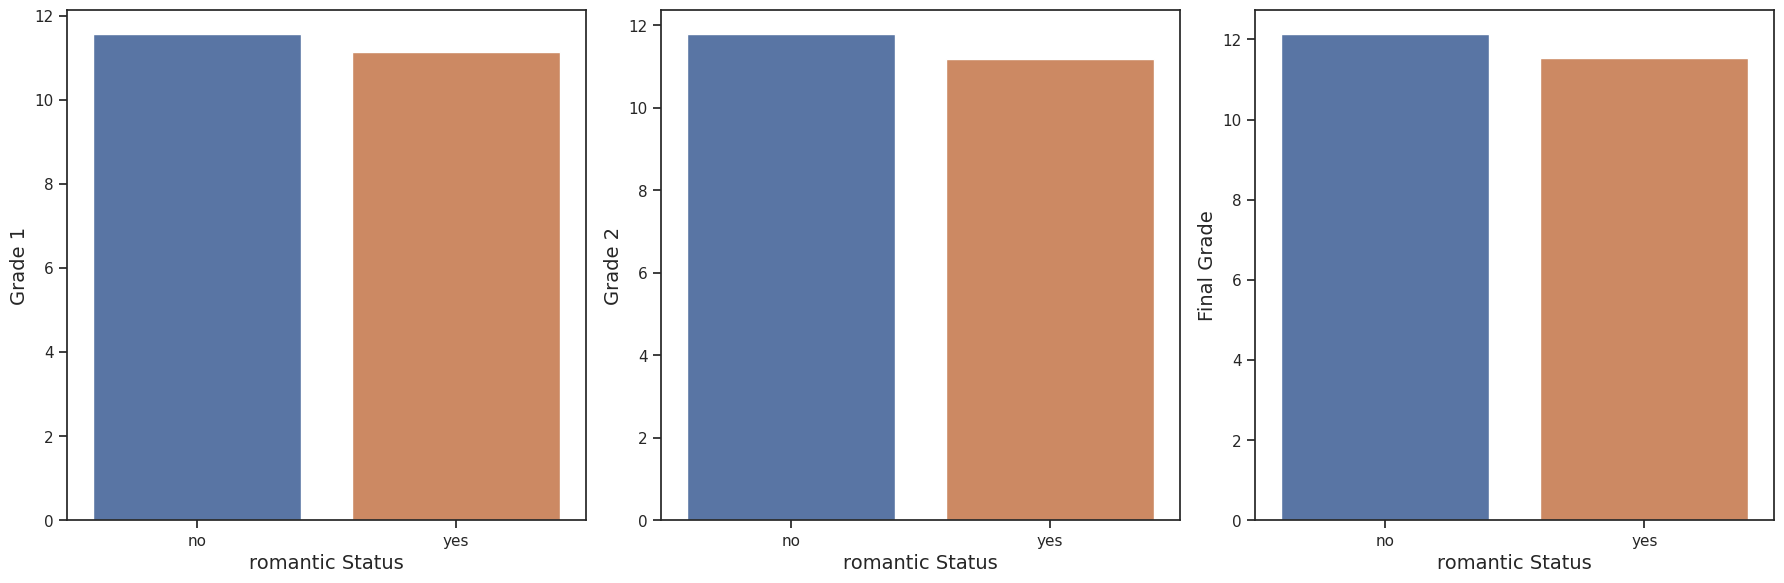

In [32]:
# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Grade 1 plot
b1 = sns.barplot(x=data['romantic'], y=data['G1'], data=data, errorbar=None, ax=axs[0])
b1.set_xlabel("romantic Status", fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Grade 2 plot
b2 = sns.barplot(x=data['romantic'], y=data['G2'], data=data, errorbar=None, ax=axs[1])
b2.set_xlabel("romantic Status", fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Final Grade plot
b3 = sns.barplot(x=data['romantic'], y=data['G3'], data=data, errorbar=None, ax=axs[2])
b3.set_xlabel("romantic Status", fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Note :** Hubungan asmara ternyata tidak menunjukan grafik yang segnifikan, dengan nilai grade yang lebih unggul dimiliki siswa yang tidak memiliki hubungan asmara

### **3.14 Does the failures effect on the student grades?**

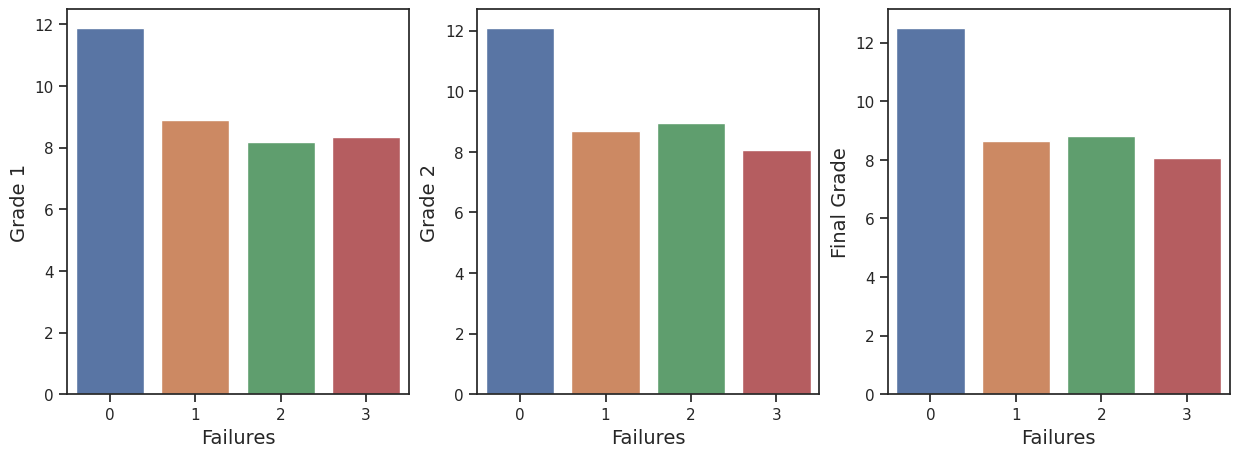

In [33]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart for 'G1'
b1 = sns.barplot(x=data['failures'], y=data['G1'], data=data, errorbar=None, ax=axes[0])
b1.set_xlabel('Failures', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Plot the second chart for 'G2'
b2 = sns.barplot(x=data['failures'], y=data['G2'], data=data, errorbar=None, ax=axes[1])
b2.set_xlabel('Failures', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Plot the third chart for 'G3'
b3 = sns.barplot(x=data['failures'], y=data['G3'], data=data, errorbar=None, ax=axes[2])
b3.set_xlabel('Failures', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Display the plots
plt.show()


> #### **how the Grade first and second effect on the student final grades?**

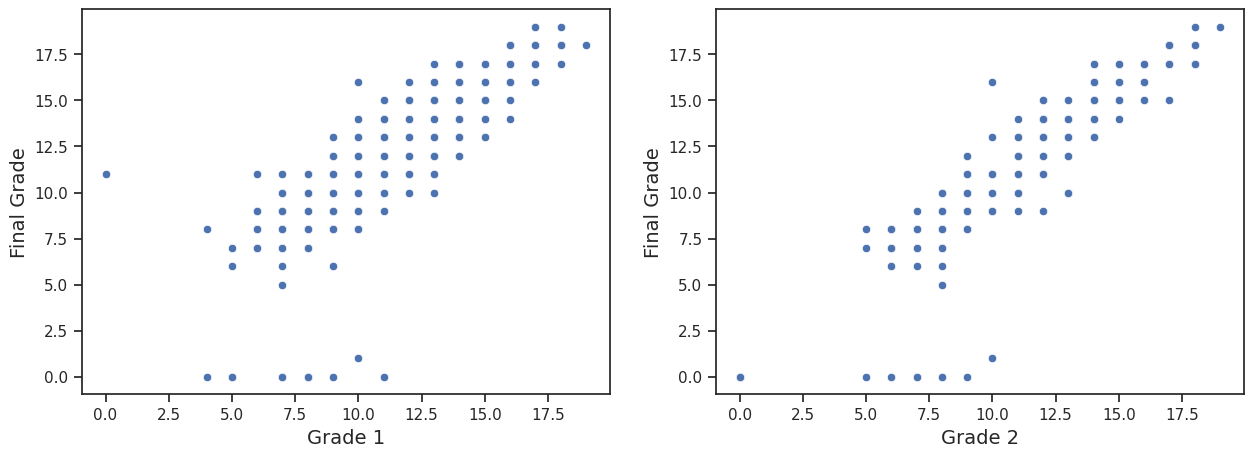

In [34]:
# Create a subplot grid with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the first chart for 'G1'
b1= sns.scatterplot(x=data['G1'],y=data['G3'],data=data, ax=axes[0])
b1.set_xlabel('Grade 1', fontsize = 14)
b1.set_ylabel('Final Grade', fontsize = 14)

# Plot the first chart for 'G2'
b2= sns.scatterplot(x=data['G2'],y=data['G3'],data=data, ax=axes[1])
b2.set_xlabel('Grade 2', fontsize = 14)
b2.set_ylabel('Final Grade', fontsize = 14)

# Display the plots
plt.show()

> #### **Does the absences effect on the student grades?**



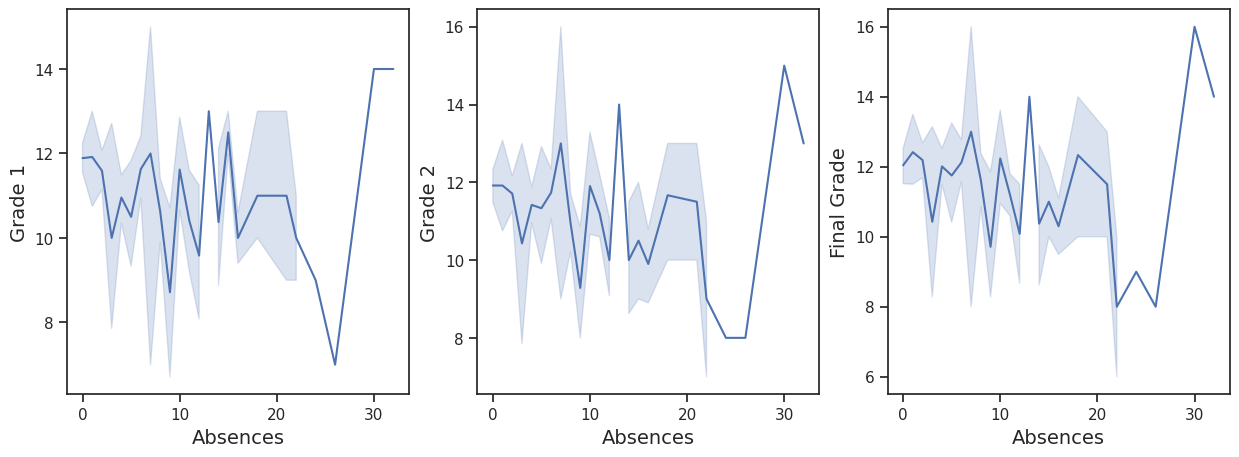

In [35]:
# Create a subplot grid with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first chart for 'G1'
b1 = sns.lineplot(x='absences', y='G1', data=data, ax=axes[0])
b1.set_xlabel('Absences', fontsize=14)
b1.set_ylabel('Grade 1', fontsize=14)

# Plot the second chart for 'G2'
b2 = sns.lineplot(x='absences', y='G2', data=data, ax=axes[1])
b2.set_xlabel('Absences', fontsize=14)
b2.set_ylabel('Grade 2', fontsize=14)

# Plot the third chart for 'G3'
b3 = sns.lineplot(x='absences', y='G3', data=data, ax=axes[2])
b3.set_xlabel('Absences', fontsize=14)
b3.set_ylabel('Final Grade', fontsize=14)

# Display the plots
plt.show()


**Note:** siswa yang memiliki jumlah absen diantara 20-26, mendapatkan grade yang lebih tinggi

### **3.15 The relation between numerical attributes (Heatmap)**

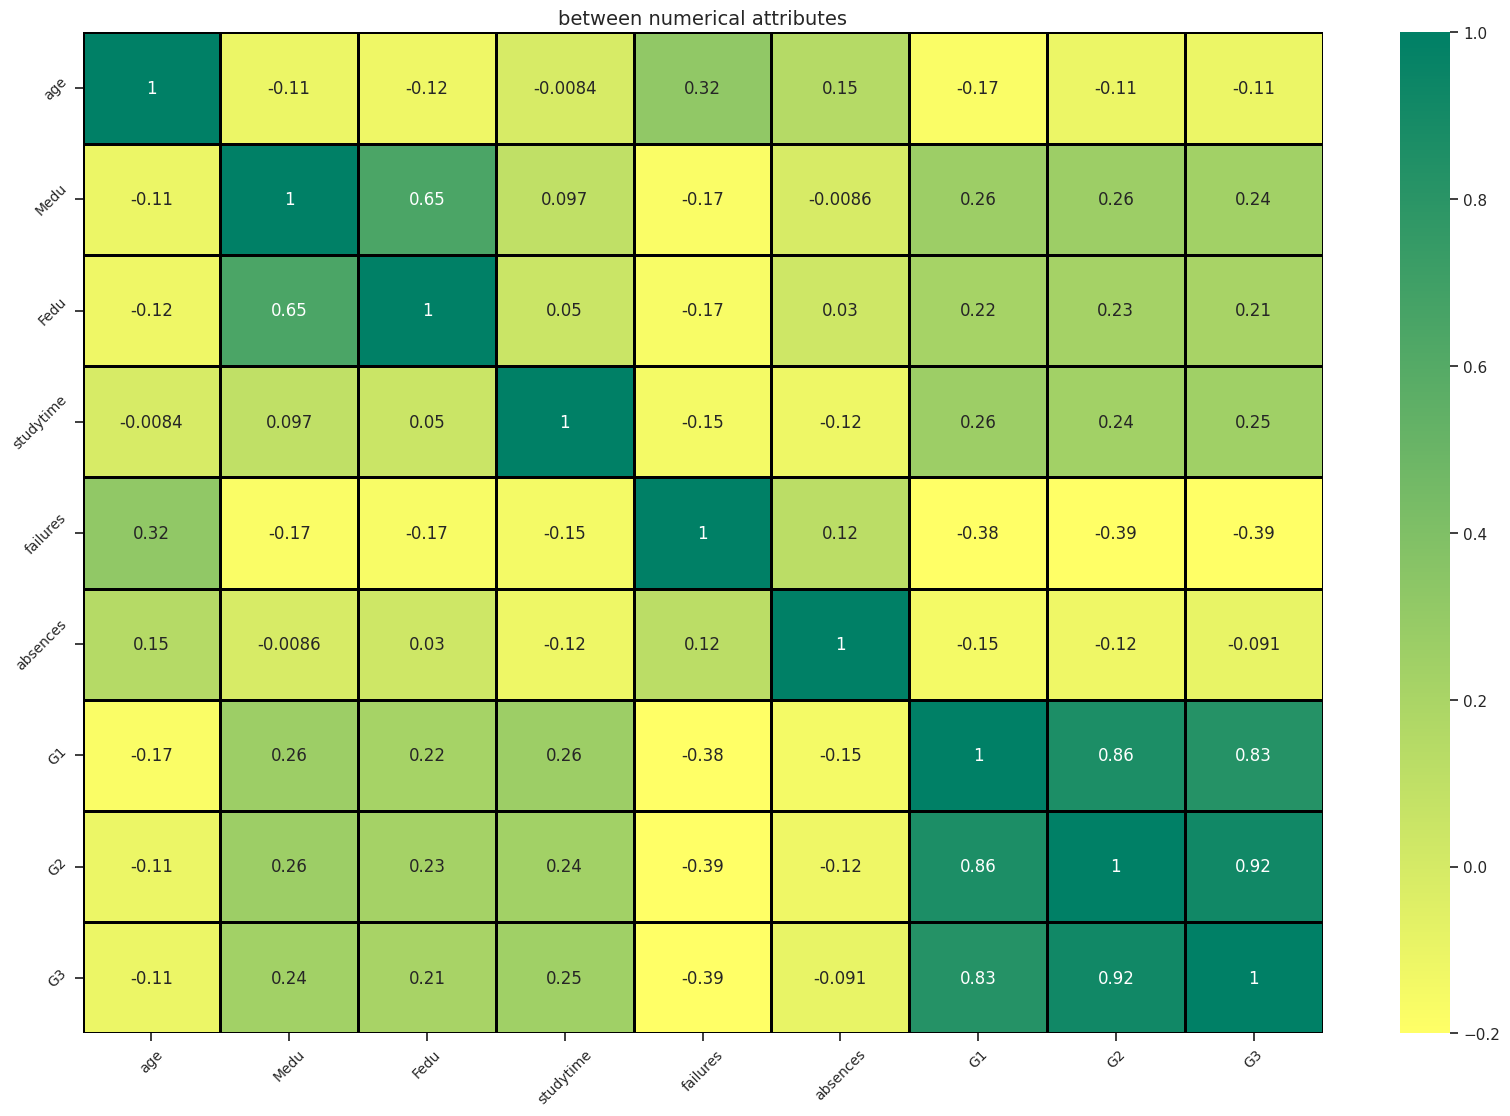

In [36]:
plt.figure(figsize=(20,13))
sns.heatmap(data.corr(numeric_only = True),
           cmap="summer_r",
            linewidth=0.75,
            linecolor="black",
            vmin=-0.2,
            vmax=1,
            annot=True,
            annot_kws={"size":12})
plt.tick_params(labelsize=10, rotation=45)
plt.title("between numerical attributes", size=14)

plt.show()

## **4. Data Peprocessing**

### **Clean data**

Menghapus data grade3 yang 0 hal ini dilakukan karena 0 menunjukan siswa yang gagal pada semester tersebut dan tidak mendapatkan ranking

In [37]:
data.drop(data[data['G3'] < 1].index, inplace = True)
data

,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,studytime,failures,activities,higher,internet,romantic,absences,G1,G2,G3
0,F,18,GT3,A,4,4,at_home,teacher,mother,2,0,no,yes,no,no,4,0,11,11
1,F,17,GT3,T,1,1,at_home,other,father,2,0,no,yes,yes,no,2,9,11,11
2,F,15,LE3,T,1,1,at_home,other,mother,2,0,no,yes,yes,no,6,12,13,12
3,F,15,GT3,T,4,2,health,services,mother,3,0,yes,yes,yes,yes,0,14,14,14
4,F,16,GT3,T,3,3,other,other,father,2,0,no,yes,no,no,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,GT3,T,2,3,services,other,mother,3,1,yes,yes,yes,no,4,10,11,10
645,F,18,LE3,T,3,1,teacher,services,mother,2,0,no,yes,yes,no,4,15,15,16
646,F,18,GT3,T,1,1,other,other,mother,2,0,yes,yes,no,no,6,11,12,9
647,M,17,LE3,T,3,1,services,services,mother,1,0,no,yes,yes,no,6,10,10,10


### **Encoding categorical data**

In [38]:
data_ohe = pd.get_dummies(data, drop_first=True)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 648
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              634 non-null    int64
 1   Medu             634 non-null    int64
 2   Fedu             634 non-null    int64
 3   studytime        634 non-null    int64
 4   failures         634 non-null    int64
 5   absences         634 non-null    int64
 6   G1               634 non-null    int64
 7   G2               634 non-null    int64
 8   G3               634 non-null    int64
 9   sex_M            634 non-null    uint8
 10  famsize_LE3      634 non-null    uint8
 11  Pstatus_T        634 non-null    uint8
 12  Mjob_health      634 non-null    uint8
 13  Mjob_other       634 non-null    uint8
 14  Mjob_services    634 non-null    uint8
 15  Mjob_teacher     634 non-null    uint8
 16  Fjob_health      634 non-null    uint8
 17  Fjob_other       634 non-null    uint8
 18  Fjob_servi

### **Feature selection**

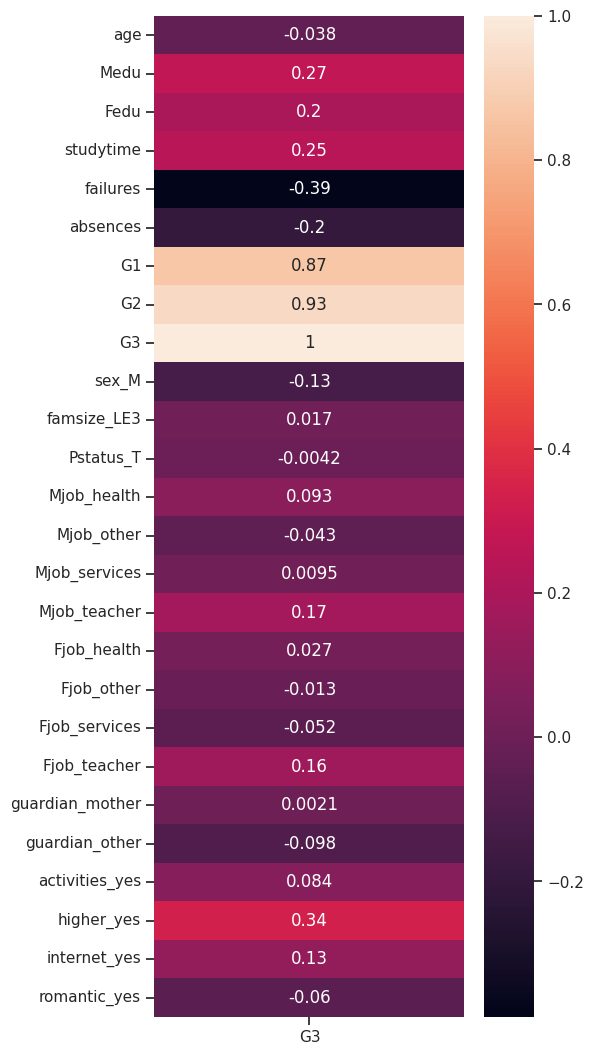

In [39]:
# Calculate the correlation matrix for all columns
correlation_matrix = data_ohe.corr()

# Extract the correlation values for the 'G3' column
G3_corr = correlation_matrix['G3']

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 13))
sns.heatmap(G3_corr.to_frame(), annot=True, cbar=True)
plt.show()

In [40]:
G3_corr.describe()

count    26.000000
mean      0.135410
std       0.331453
min      -0.387703
25%      -0.041833
50%       0.022152
75%       0.191542
max       1.000000
Name: G3, dtype: float64

> #### **Menghapus feature yang kurang dari rata rata**



In [41]:
THRESHOLD = 0.19

In [42]:
data_ohe_after_drop_features = data_ohe.copy()

In [43]:
for key, value in G3_corr.items():
  if abs(value) < THRESHOLD:
    data_ohe_after_drop_features.drop(columns= key, inplace=True)

In [44]:
#data_ohe_after_drop_features.drop(columns= ['absences'], inplace=True)

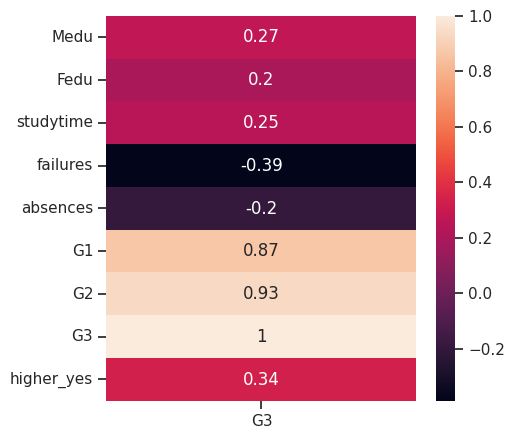

In [45]:
# Extract the correlation values for the 'G3' column
G3_corr = data_ohe_after_drop_features.corr()["G3"]

# Create a heatmap of the correlation values
plt.figure(figsize=(5, 5))
sns.heatmap(G3_corr.to_frame(), annot=True, cbar=True)
plt.show()

In [46]:
X = data_ohe_after_drop_features.drop('G3',axis = 1).values
y = data_ohe_after_drop_features['G3'].values

## **5. Training Models**

### **Regression Model**

In [47]:
def train_regression_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

    model1 = LinearRegression()
    model2 = BayesianRidge()
    model3 = RandomForestRegressor()
    model4 = GradientBoostingRegressor()
    model5 = DecisionTreeRegressor()
    model6 = Ridge()
    model7 = Lasso()

    models = [model1, model2, model3, model4, model5, model6, model7 ]
    model_name_list = ['LinearRegression', 'BayesianRidge', 'RandomForestRegressor', 'GradientBoostingRegressor',
           'DecisionTreeRegressor', 'Ridge', 'Lasso']

    # Dataframe for results
    results = pd.DataFrame(columns=['MAE', 'RMSE', 'RMSE by cross validation', 'MSE', 'R^2'], index=model_name_list)

    for i, model in enumerate(models):
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_test_pred = model.predict(X_test)

        # Calculate evaluation metrics
        mse = mean_squared_error(y_test, y_test_pred)
        mae = mean_absolute_error(y_test, y_test_pred)
        rmse = np.sqrt(mse)
        r_squared = r2_score(y_test, y_test_pred)

        # Cross-validation
        scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
        rmse_cross_val = np.sqrt(-scores.mean())

        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse, rmse_cross_val ,mse,r_squared ]

    return results

In [48]:
train_regression_model(X, y)

,MAE,RMSE,RMSE by cross validation,MSE,R^2
LinearRegression,0.681023,0.836505,0.997447,0.699741,0.914607
BayesianRidge,0.683222,0.839026,0.940976,0.703965,0.914091
RandomForestRegressor,0.860182,1.065435,0.856804,1.135152,0.861471
GradientBoostingRegressor,0.706558,0.869971,0.957482,0.756849,0.907638
DecisionTreeRegressor,1.078125,1.316957,1.103607,1.734375,0.788345
Ridge,0.68125,0.836761,0.973085,0.700169,0.914555
Lasso,0.770959,0.944473,0.909117,0.892029,0.891141


**Note :** dari tabel diatas algoritma LinearRegression memiliki nilai yang paling tinggi dan dijadikan acuan training data

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=42)

best_model = LinearRegression()
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)


Text(0, 0.5, 'Predicted')

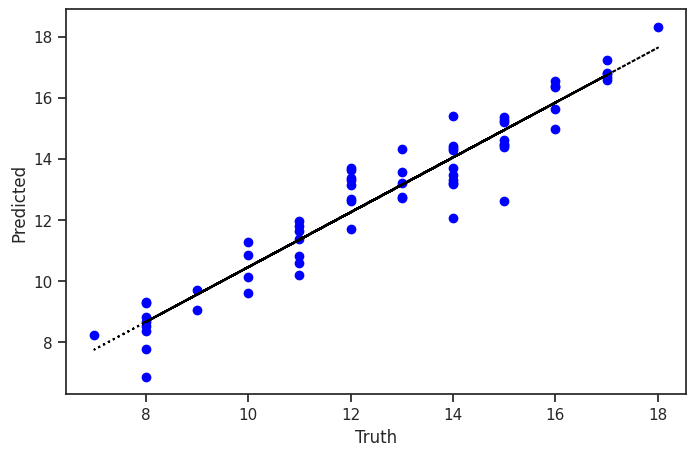

In [50]:
from numpy.polynomial.polynomial import polyfit

n,m=polyfit(y_test,y_test_pred,1)
plt.figure(figsize=(8,5))
plt.scatter(x = y_test, y = y_test_pred, c="blue")
plt.plot(y_test,  m*(y_test) + n   ,':', c="black")
plt.xlabel("Truth")
plt.ylabel("Predicted")

In [51]:
data_ohe_after_drop_features.drop('G3',axis = 1)

,Medu,Fedu,studytime,failures,absences,G1,G2,higher_yes
0,4,4,2,0,4,0,11,1
1,1,1,2,0,2,9,11,1
2,1,1,2,0,6,12,13,1
3,4,2,3,0,0,14,14,1
4,3,3,2,0,0,11,13,1
...,...,...,...,...,...,...,...,...
644,2,3,3,1,4,10,11,1
645,3,1,2,0,4,15,15,1
646,1,1,2,0,6,11,12,1
647,3,1,1,0,6,10,10,1


In [52]:
tes =[[3,  3,  2,  0,  0, 13, 14,  1 ], [4,  3,  2,  0,  0, 100, 50,  1]]

tes_predik = best_model.predict(tes)

print(tes_predik)

[14.25395951 58.42637405]


## **6. Export Model**

In [56]:
from os import pipe
import pickle

#export data
with open("grade_siswa.pkl","wb") as model_file:
  pickle.dump(best_model, model_file)

In [59]:
#load data
with open("grade_siswa.pkl","rb") as model_file:
  loaded_model=pickle.load(model_file)

In [60]:
model_test =[[3,  3,  2,  0,  0, 13, 14,  1 ], [4,  3,  2,  0,  0, 100, 50,  1]]

loaded_model.predict(model_test)

array([14.25395951, 58.42637405])